# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm import tqdm
import math
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from pathlib import Path
import joblib

# User Config

In [3]:
class Config:
    def __init__(self):
        self.dataset = 'Data/diabetes.csv'
        self.dataset_name = "Diabetes"
        self.features = ['Pregnancies',
                         'PlasmaGlucose',
                         'DiastolicBloodPressure',
                         'TricepsThickness',
                         'SerumInsulin',
                         'BMI',
                         'DiabetesPedigree',
                         'Age'
                        ]
        self.label = 'Diabetic'
        
#         self.dataset = 'Data/penguins.csv'
#         self.features = ['CulmenLength',
#                          'CulmenDepth',
#                          'FlipperLength',
#                          'BodyMass'
#                         ]
#         self.label = 'Species'
        
        self.dataset = 'Data/breast-cancer-wisconsin.csv'
        self.dataset_name = "Breast Cancer"
        self.features = ["Clump Thickness",
                         "Uniformity of Cell Size",
                         "Uniformity of Cell Shape",
                         "Marginal Adhesion",
                         "Single Epithelial Cell Size",
                         "Bare Nuclei",
                         "Bland Chromatin",
                         "Normal Nucleoli",
                         "Mitoses"
                        ]
        self.label = 'Class'
        
        self.random_seed = 101
        
config = Config()

# Read File

In [4]:
# load the training dataset
df = pd.read_csv(config.dataset)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# EDA

In [5]:
# Understand number of rows and columns 
df.shape

(683, 11)

In [6]:
# Understand what your columns are and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
# Understand the descriptive statistics of your numerical data
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
# Check for null values
df.isna().sum() / len(df)*100
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Sample code number             0.0
Clump Thickness                0.0
Uniformity of Cell Size        0.0
Uniformity of Cell Shape       0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Bland Chromatin                0.0
Normal Nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

In [9]:
# notice imbalanced data set
df[config.label].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [13]:
benign = df[df[config.label]==2]
benign_sample = benign.sample(n=239, replace=False, random_state=config.random_seed, ignore_index=True)
benign_sample

malig = df[df[config.label]==4]
malig

df = pd.concat([benign_sample, malig], ignore_index=True)
df['Class'] = [0 if x==2 else 1 for x in df['Class'] ]

In [11]:
# peng0 = df[df[config.label]==0]
# peng0_sample = peng0.sample(n=68, replace=False, random_state=config.random_seed, ignore_index=True)
# peng0_sample

# peng1 = df[df[config.label]==1]
# peng1_sample = peng1.sample(n=68, replace=False, random_state=config.random_seed, ignore_index=True)
# peng1_sample

# peng2 = df[df[config.label]==2]
# peng2

# df = pd.concat([peng0_sample, peng1_sample, peng2], ignore_index=True)

In [ ]:
# non_diabetic = df[df['Diabetic']==0]
# non_diabetic_sample = non_diabetic.sample(frac=0.5, replace=False, random_state=config.random_seed, ignore_index=True)
# non_diabetic_sample

# diabetic = df[df['Diabetic']==1]
# diabetic

# df = pd.concat([non_diabetic_sample, diabetic], ignore_index=True)

In [14]:
df[config.label].value_counts()

0    239
1    239
Name: Class, dtype: int64

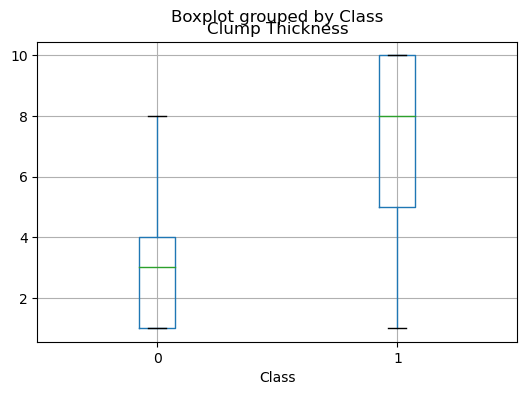

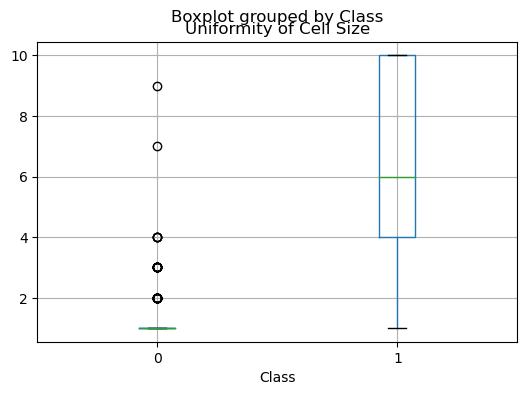

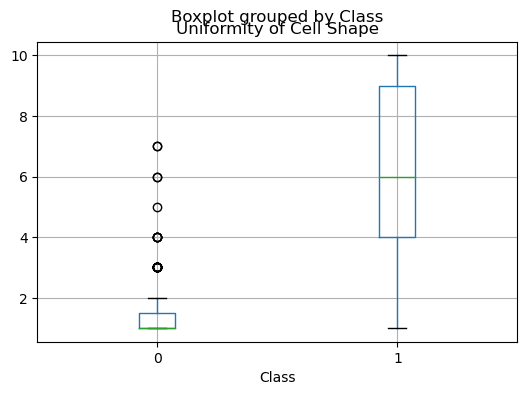

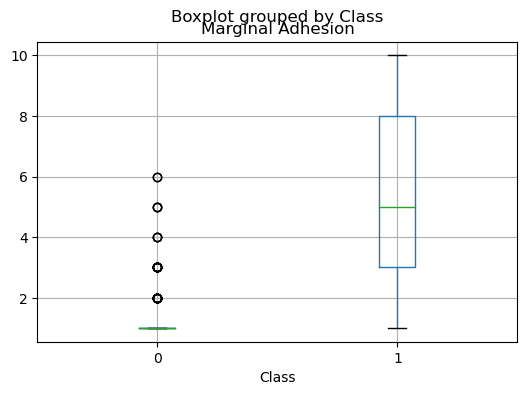

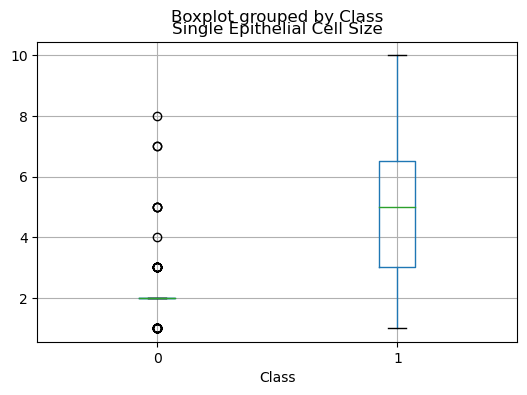

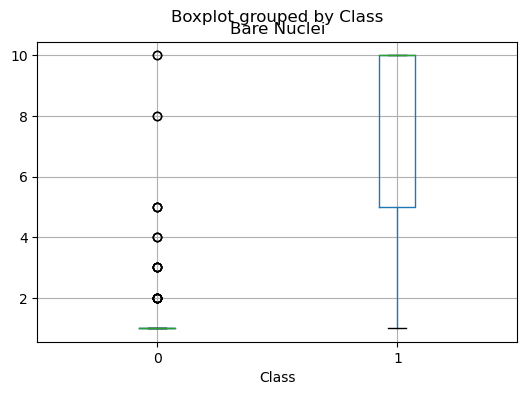

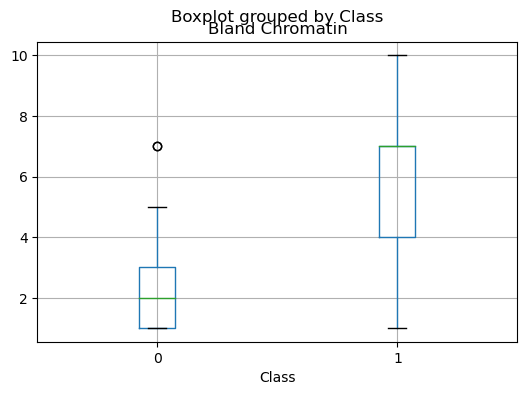

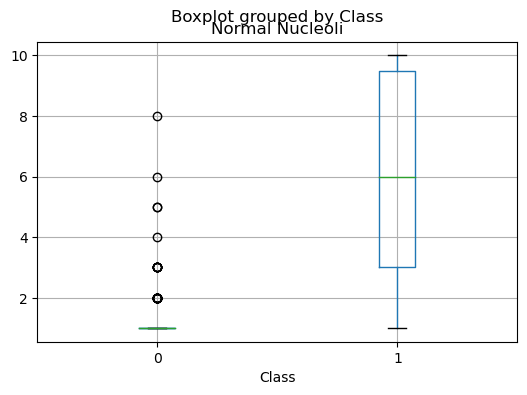

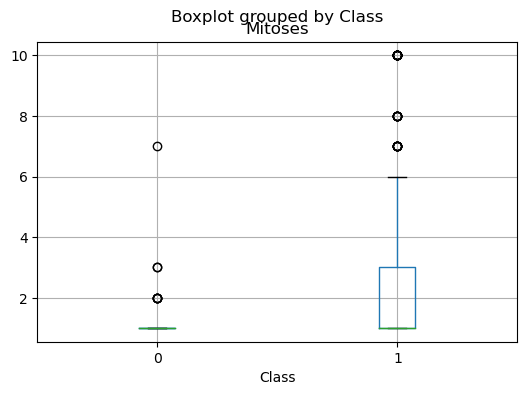

In [15]:
for col in config.features:
    df.boxplot(column=col, by=config.label, figsize=(6,4))
    # plt.title(col)
plt.show()

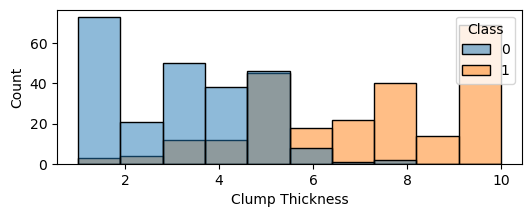

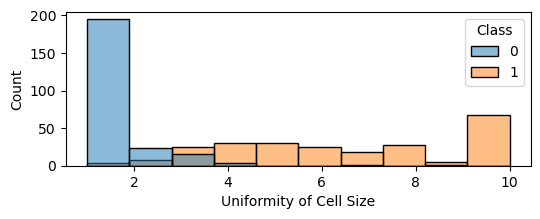

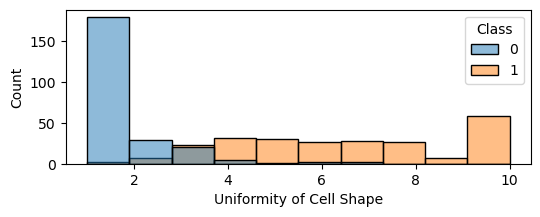

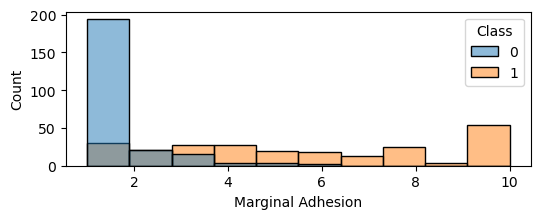

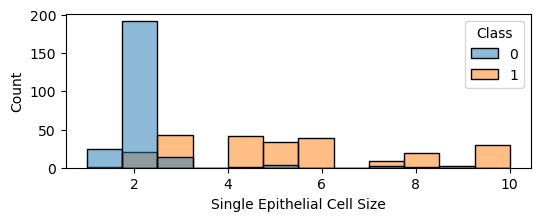

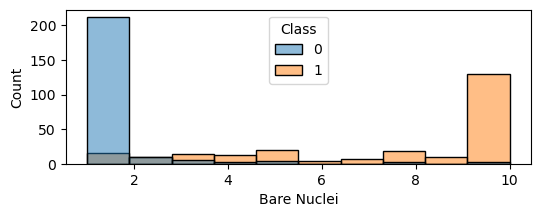

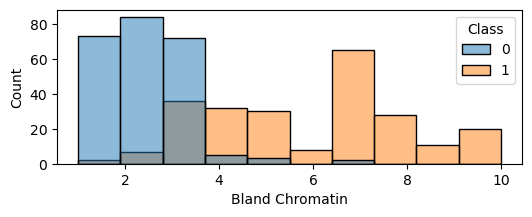

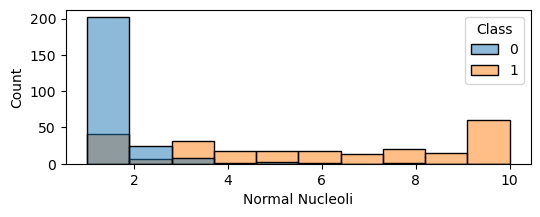

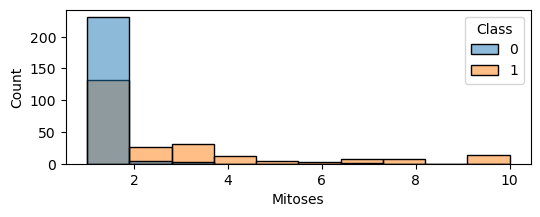

In [16]:
for col in config.features:
#     fg = sns.FacetGrid(df, col=config.label)
#     fg.map(plt.hist, col)
    plt.figure(figsize=(6,2))
    sns.histplot(data=df, x=col, hue=config.label)
    plt.show()

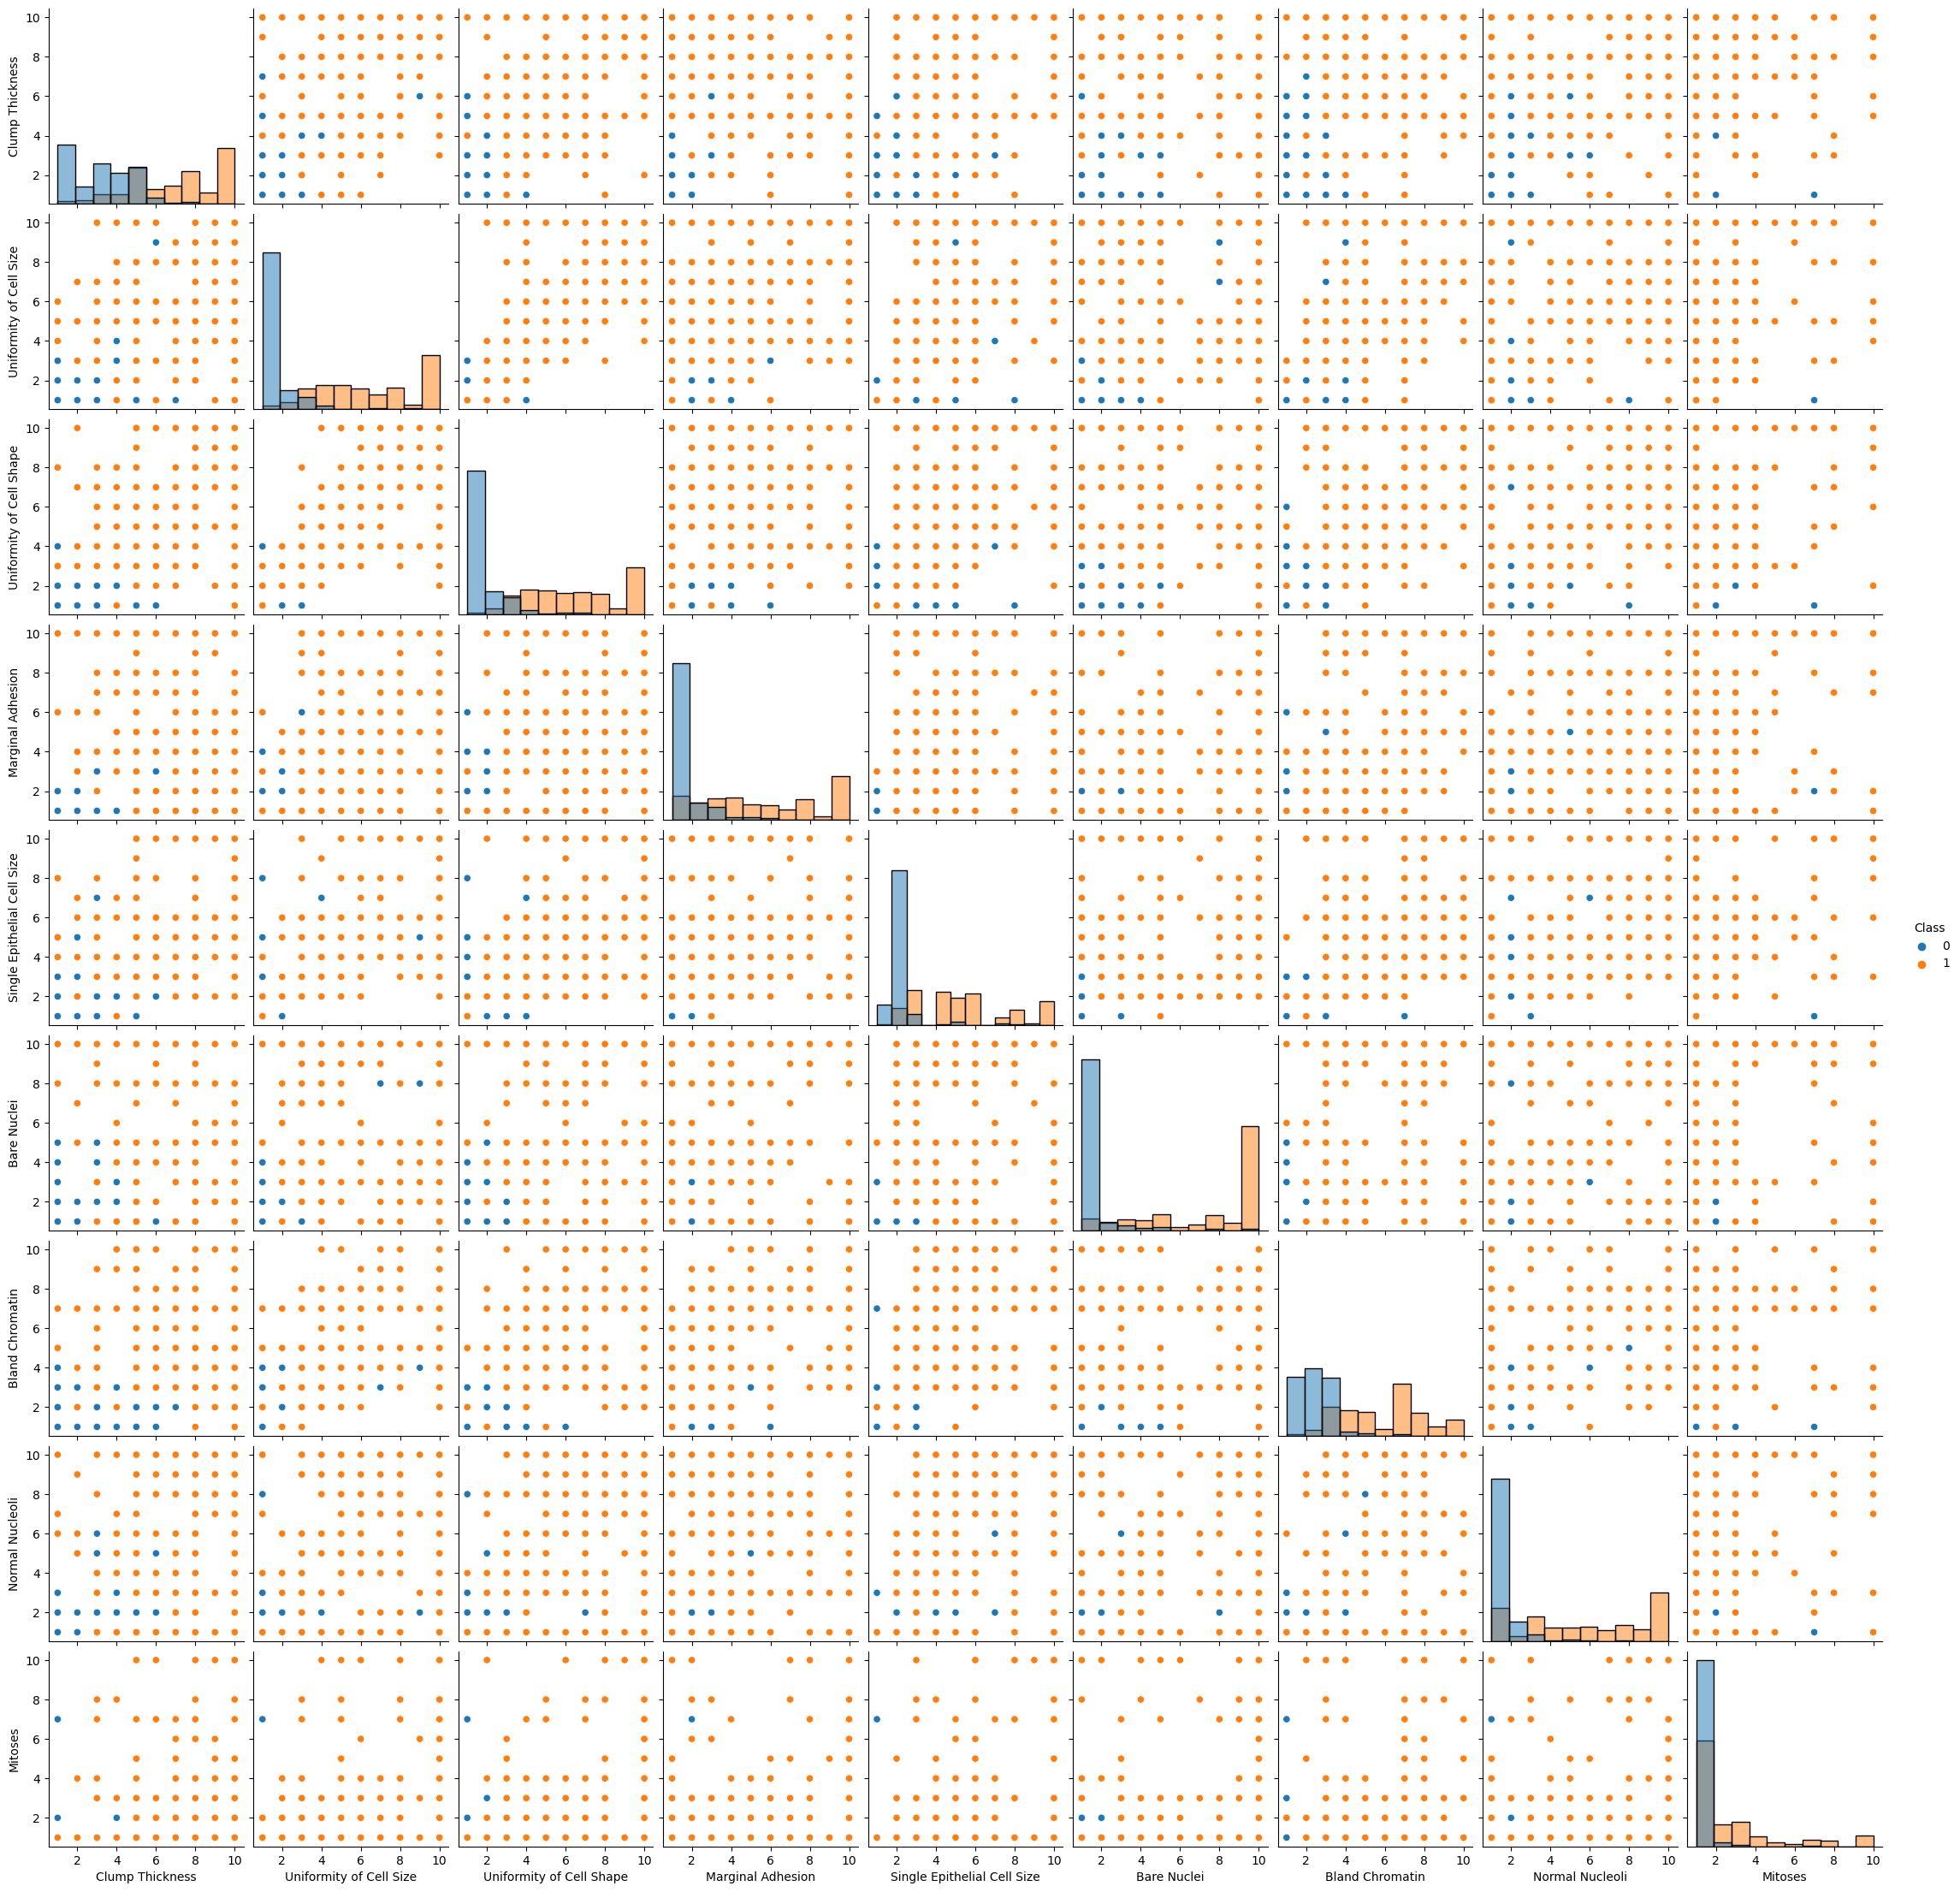

In [17]:
sns.pairplot(df[config.features + [config.label]], hue=config.label, diag_kind="hist")

# Train Test Split

In [18]:
X = df[config.features].values

y = df[config.label].values


In [19]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=config.random_seed) 

print(f"Training Cases: {len(X_train)} \nTest Cases: {len(X_test)}")

Training Cases: 406 
Test Cases: 72


# Modelling

In [ ]:
# Decision trees with some form of pruning
# Neural networks
# Boosting
# Support Vector Machines
# k-nearest neighbors

In [ ]:
# train a Decisition Tree Classifier model on the training set
model = DecisionTreeClassifier(criterion='gini', 
                               splitter='best', 
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_features=None, 
                               random_state=None, #config.random_seed, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               class_weight=None, 
                               ccp_alpha=0.0,
                               )

# model = AdaBoostClassifier(base_estimator=None,
#                            n_estimators=50, 
#                            learning_rate=1.0, 
#                            algorithm='SAMME.R', 
#                            random_state=None
#                           )

# model = KNeighborsClassifier(n_neighbors=5, 
#                              weights='uniform', 
#                              algorithm='auto', 
#                              leaf_size=30, 
#                              p=2, 
#                              metric='minkowski', 
#                              metric_params=None, 
#                              n_jobs=-1
#                             )

model = SVC(C=1.0, 
            kernel='rbf', 
            degree=3, 
            gamma='scale', 
            coef0=0.0, 
            shrinking=True, 
            probability=False, 
            tol=0.001, 
            cache_size=200, 
            class_weight=None, 
            verbose=False, 
            max_iter=-1, 
            decision_function_shape='ovr', 
            break_ties=False, 
            random_state=None
           )

# model = MLPClassifier(hidden_layer_sizes=(100,), 
#                       activation='relu', 
#                       solver='adam', 
#                       alpha=0.0001, 
#                       batch_size='auto', 
#                       learning_rate='constant', 
#                       learning_rate_init=0.001, 
#                       power_t=0.5, 
#                       max_iter=200, 
#                       shuffle=True, 
#                       random_state=None, 
#                       tol=0.0001, 
#                       verbose=False, 
#                       warm_start=False, 
#                       momentum=0.9, 
#                       nesterovs_momentum=True, 
#                       early_stopping=False, 
#                       validation_fraction=0.1, 
#                       beta_1=0.9, 
#                       beta_2=0.999, 
#                       epsilon=1e-08, 
#                       n_iter_no_change=10, 
#                       max_fun=15000
#                      )

# Preprocessing

In [ ]:
# # Train the model
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # Define preprocessing for numeric columns (normalize them so they're on the same scale)
# # numeric_features = [0,1,2,3,4,5,6]
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# # Define preprocessing for categorical features (encode the Age column)
# categorical_features = [7]
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# # Create preprocessing and training pipeline
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('logregressor', model)])

# # Create preprocessing and training pipeline
# pipeline = Pipeline(steps=[('scaler', StandardScaler()),
#                            ('knn', model)])



# # fit the pipeline to train a logistic regression model on the training set
# model = pipeline.fit(X_train, y_train)
# print (model)

In [ ]:
if isinstance(model, KNeighborsClassifier) or isinstance(model, SVC) or isinstance(model, MLPClassifier):
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)

    X_test = scaler.transform(X_test)

    X = scaler.fit_transform(X) # For timing and validation curve experiments below




# Single Model Fit and Predict

In [ ]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Single Model Evaluation

In [ ]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

In [ ]:
if isinstance(model, DecisionTreeClassifier) or isinstance(model, AdaBoostClassifier):
    print(model.feature_importances_) 

In [ ]:
config.features

In [ ]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import confusion_matrix

# y_scores = model.predict_proba(X_test)

# # calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# # plot ROC curve
# fig = plt.figure(figsize=(6, 6))
# # Plot the diagonal 50% line
# plt.plot([0, 1], [0, 1], 'k--')
# # Plot the FPR and TPR achieved by our model
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

In [ ]:
# from sklearn.metrics import roc_auc_score

# auc = roc_auc_score(y_test,y_scores[:,1])
# print('AUC: ' + str(auc))

# Experiments

## Gridsearch Experiment

In [ ]:
%%time

if isinstance(model, DecisionTreeClassifier):
    param_grid = { 
        'criterion' : ["gini", "entropy", "log_loss"],
        'max_depth' : [int(x) for x in np.linspace(1, 20, num = 20)],
#         'min_samples_split' : [int(x) for x in np.linspace(2, 50, num = 10)],
#         'min_samples_leaf' : [int(x) for x in np.linspace(1, 20, num = 10)],
#         'max_features' : [int(x) for x in np.linspace(2, X.shape[1], num = X.shape[1]-1)]
    }
elif isinstance(model, AdaBoostClassifier):
    param_grid = { 
        "n_estimators": [int(x) for x in np.linspace(1, 100, num = 20)], 
        "learning_rate": [float(x) for x in np.linspace(0.1, 2.0, 20)],
        "algorithm": ['SAMME', 'SAMME.R'], 
    }
elif isinstance(model, KNeighborsClassifier):
    param_grid = { 
        "n_neighbors": [int(x) for x in np.linspace(1, 50, num = 50)], 
#         "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'] , 
        "p": [int(x) for x in np.linspace(1, 3, num = 3)], 

    }
elif isinstance(model, SVC):
    param_grid = { 
        "C": [float(x) for x in np.linspace(0.1, 10.1, 21)], 
        "kernel": ["linear", "poly", "rbf", "sigmoid"], 
#         degree=3, 
#         gamma='scale', 
#         coef0=0.0, 
#         shrinking=True, 
#         probability=False, 
#         tol=0.001, 
#         cache_size=200, 
#         class_weight=None, 
#         verbose=False, 
#         max_iter=-1, 
#         decision_function_shape='ovr', 
#         break_ties=False, 
#         random_state=None
    }
else: #MLPClassifier()
    param_grid = { 
        "hidden_layer_sizes": [(int(x),) for x in np.linspace(1, 150, num = 16)] + [(130,130), (130,130,130)],
        'max_iter': [500,1000,1500,2000], 
        'alpha': 10.0 ** -np.arange(1, 7), 
#         activation='relu', 
#         'solver':['lbfgs', 'sgd', 'adam'], 
#         alpha=0.0001, 
#         batch_size='auto', 
#         'learning_rate':["constant", "invscaling", "adaptive"] 
#         learning_rate_init=0.001, 
#         power_t=0.5, 
#         max_iter=200, 
#         shuffle=True, 
#         random_state=None, 
#         tol=0.0001, 
#         verbose=False, 
#         warm_start=False, 
#         momentum=0.9, 
#         nesterovs_momentum=True, 
#         early_stopping=True, 
#         validation_fraction=0.1, 
#         beta_1=0.9, 
#         beta_2=0.999, 
#         epsilon=1e-08, 
#         n_iter_no_change=100, 
#         max_fun=15000
    }

grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X, y)

In [ ]:
# %%time 
# param_grid = { 
#         "n_neighbors": [int(x) for x in np.linspace(, 1000, num = 20)], 
#         "weights": ['uniform', 'distance'] ,
#         "p": [int(x) for x in np.linspace(1, 12, num = 12)], 
#     }

# pipeline = Pipeline(steps=[('scaler', StandardScaler()),
#                            ('grid', GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1))])
# pipeline.fit(X_train, y_train)

In [ ]:
grid_search_experiment_df = pd.DataFrame(grid_search.cv_results_)
grid_search_experiment_df.head()

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
if isinstance(model, DecisionTreeClassifier) or isinstance(model, AdaBoostClassifier):
#     print(grid_search.best_estimator_.feature_importances_) 
    dfz = pd.DataFrame(zip(config.features, grid_search.best_estimator_.feature_importances_), columns=["Feature", "Feature Importance"])
    dfz.sort_values(by="Feature Importance", ascending=False, inplace=True)
    dfz.plot(kind='bar', x='Feature', y='Feature Importance', title=f"Feature Importances - {config.dataset_name}", figsize=(6,2))


In [ ]:
config.features

In [ ]:
# grid_search_experiment_df[(grid_search_experiment_df['param_criterion'] == 'entropy')
#                           # & (grid_search_experiment_df['param_min_samples_leaf'] == 1)
#                           # & (grid_search_experiment_df['param_min_samples_split'] == 2)
#                           # & (grid_search_experiment_df['param_max_depth'] == 9)
#                          ].plot("param_max_depth", "mean_test_score", style="o-")

In [ ]:
fig, ax = plt.subplots()
grid_search_experiment_df.pivot_table(values="mean_test_score", index="param_max_depth", columns="param_criterion").plot(marker="o", ax=ax, figsize=(6,3))
# sns.lineplot("param_max_depth", "mean_test_score", hue="param_criterion", data=grid_search_experiment_df, marker="o", ax=ax)
ax.set_xticks(param_grid['max_depth'])
ax.set_ylabel("Score")
ax.set_title(f"Accuracy Vs. max_depth - {config.dataset_name}")
ax.grid()

In [ ]:
# same plot using Seaborn
# fig = px.line(grid_search_experiment_df, x="param_max_depth", y="mean_test_score", color='param_criterion')
# fig.show()

## Timing Experiment 

In [ ]:
# splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
# reps = 5 # number of times to run each experiment for mean calculation

# fit_times = np.zeros(shape=(len(splits), reps))
# pred_times = np.zeros(shape=(len(splits), reps))
# test_accuracies = np.zeros(shape=(len(splits), reps))
# train_accuracies = np.zeros(shape=(len(splits), reps))

# for i, split in enumerate(tqdm(splits)):
#     for j in range(reps):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split,)# random_state=config.random_seed) 

#         # Get time to fit model
#         start_time = time.time()
#         grid_search.best_estimator_.fit(X_train, y_train)
#         end_time = time.time()
#         wall_time = end_time - start_time
#         fit_times[i, j] = wall_time

#         # Get time to make test_predictions
#         start_time = time.time()
#         test_predictions = grid_search.best_estimator_.predict(X_test)
#         end_time = time.time()
#         wall_time = end_time - start_time
#         pred_times[i, j] = wall_time
        
#         #train_predictions = model.predict(X_train)

#         train_accuracies[i, j] = grid_search.best_estimator_.score(X_train, y_train)#accuracy_score(y_train, train_predictions)
#         test_accuracies[i, j] = grid_search.best_estimator_.score(X_test, y_test) #accuracy_score(y_test, test_predictions)
        
# # Calculate the average of reps
# mean_train_accuracies = np.mean(train_accuracies, axis=1)
# mean_test_accuracies = np.mean(test_accuracies, axis=1)
# mean_fit_times = np.mean(fit_times, axis=1)
# mean_pred_times = np.mean(pred_times, axis=1)

# # Store results in df
# time_experiment_df = pd.DataFrame({"train_size": splits, 
#                                    "mean_fit_times": mean_fit_times, 
#                                    "mean_pred_times": mean_pred_times, 
#                                    "mean_train_accuracies": mean_train_accuracies, 
#                                    "mean_test_accuracies": mean_test_accuracies})
# time_experiment_df


In [ ]:
# time_experiment_df['mean_train_loss'] = 1 - time_experiment_df['mean_train_accuracies'] 
# time_experiment_df['mean_test_loss'] = 1 - time_experiment_df['mean_test_accuracies'] 

# time_experiment_df.plot(x="train_size", y=["mean_train_loss", "mean_test_loss"])
# # time_experiment_df.plot(x="train_size", y=["mean_test_accuracies", "mean_train_accuracies"])

### Learning Curve

In [ ]:
%%time

# Code shamelessly copied from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

# train_sizes, train_scores, test_scores, fit_times, score_times  = learning_curve(grid_search.best_estimator_, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, return_times=True, shuffle=True)
train_sizes, train_scores, test_scores, fit_times, score_times  = learning_curve(tuned_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, return_times=True, shuffle=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot learning curve
axes[0].grid()
axes[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes[0].legend(loc="best")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].set_title(f"Learning Curves - {config.dataset_name}")

# # Plot n_samples vs fit_times
# axes[1].grid()
# axes[1].plot(train_sizes, fit_times_mean, "o-")
# axes[1].fill_between(
#     train_sizes,
#     fit_times_mean - fit_times_std,
#     fit_times_mean + fit_times_std,
#     alpha=0.1,
# )
# axes[1].set_xlabel("Training examples")
# axes[1].set_ylabel("fit_times")
# axes[1].set_title(f"Scalability of the model - {config.dataset_name}")

### Loss Curve for MLP

In [ ]:
%%time

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(grid_search.best_estimator_.loss_curve_, label="best_estimator10e-3")

mlp_pt1 = MLPClassifier(alpha=1e-05, 
                        hidden_layer_sizes=(130,), 
                        max_iter=1500,
                        early_stopping=True,
                        n_iter_no_change=100,
                        learning_rate_init = 0.1)
mlp_pt01 = MLPClassifier(alpha=1e-05, 
                        hidden_layer_sizes=(130,), 
                        max_iter=1500,
                        early_stopping=True,
                         n_iter_no_change=100,
                        learning_rate_init = 0.01)
# mlp_pt001 = MLPClassifier(alpha=1e-05, 
#                         hidden_layer_sizes=(130,), 
#                         max_iter=1500,
#                         early_stopping=True,
#                           n_iter_no_change=100,
#                         learning_rate_init = 0.001)
mlp_pt0001 = MLPClassifier(alpha=1e-05, 
                        hidden_layer_sizes=(130,), 
                        max_iter=1500,
                        early_stopping=True,
                           n_iter_no_change=100,
                        learning_rate_init = 0.0001)

mlp_pt1.fit(X_train, y_train)
mlp_pt01.fit(X_train, y_train)
# mlp_pt001.fit(X_train, y_train)
mlp_pt0001.fit(X_train, y_train)

ax1.plot(mlp_pt1.loss_curve_, label="learning_rate10e-1", alpha=0.5)
ax1.plot(mlp_pt01.loss_curve_, label="learning_rate10e-2", alpha=0.5)
# ax1.plot(mlp_pt001.loss_curve_, label="learning_rate10e-1")
ax1.plot(mlp_pt0001.loss_curve_, label="learning_rate10e-4", alpha=0.5)
ax1.legend()

plt.title(f"Loss Curve - {config.dataset_name}")
plt.xlabel(f"Iterations")
plt.ylabel("Loss")

### Validation Curves

In [ ]:
tuned_model = joblib.load("./Models/hypertuned_MLPClassifier().pkl")

In [ ]:
%%time 
# Code shamelessly copied from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py

# DecisionTree
param_name = "max_depth"
param_range = [int(x) for x in np.linspace(1, 20, num = 20)]
# param_name = "criterion"
# param_range = ["gini", "entropy", "log_loss"]

# AdaBoost
param_name = "learning_rate"
param_range = [float(x) for x in np.linspace(0.1, 1.8, 18)]
param_name = "n_estimators"
param_range = [int(x) for x in np.linspace(1, 200, num = 20)]

# KNN
param_name = "n_neighbors"
param_range = [int(x) for x in np.linspace(1, 30, 30)]
param_name = "p"
param_range = [int(x) for x in np.linspace(1, 12, 12)]

# SVM
param_name = "C"
param_range = [float(x) for x in np.linspace(0.1, 10.1, 21)]
# param_name = "kernel"
# param_range = ["linear", "poly", "rbf", "sigmoid"]

# # NN
param_name = "hidden_layer_sizes"
param_range = [(int(x),) for x in np.linspace(1, 150, num = 16)]
# param_range = [(30,), (30,30), (30,30,30), (30,30,30,30)]
param_range = [(130,), (130,130), (130,130,130), (130,130,130,130)]

# param_name = 'activation'
# param_range = ["identity", "logistic", "tanh", "relu"]
param_name = "max_iter"
param_range = list(np.arange(100, 2000, 100))
# param_name = "solver"
# param_range = ["lbfgs", "sgd", "adam"]
# param_name = "learning_rate"
# param_range = ["constant", "invscaling", "adaptive"] 

train_scores, test_scores = validation_curve(
    tuned_model, #grid_search.best_estimator_,
    X,
    y,
    param_name=param_name,
    param_range=param_range,
    scoring="accuracy",
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# specifically to for hidden_layer_sizes of NN
if param_name == "hidden_layer_sizes":
    param_range = [str(x) for x in param_range]

plt.figure(figsize=(6,3))
lw = 2
plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw, marker="o", 
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw, marker="o"
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.title(f"Validation Curve with {model} - {config.dataset_name}")
plt.xlabel(f"{param_name}")
plt.ylabel("Score")
# plt.xscale('log')
# plt.ylim(0.7, 1.1)
plt.legend(loc="best")
plt.grid()
plt.xticks(param_range)
plt.xticks(rotation=45)
plt.show()

# Save Model

In [ ]:
# # Save the model as a pickle file
# filename = f'./Models/{config.dataset_name}/hypertuned_{model}.pkl'
# joblib.dump(grid_search.best_estimator_, filename)

# Comparison Between Models

CPU times: total: 34.2 s
Wall time: 36.2 s


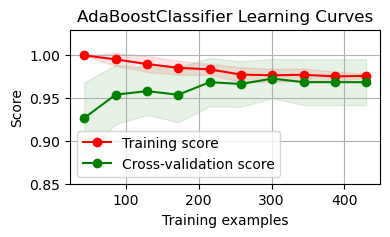

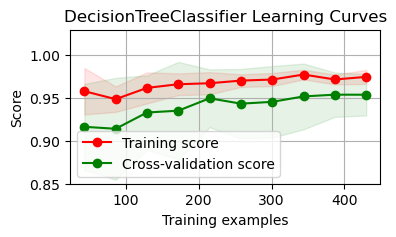

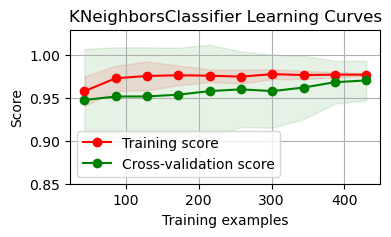

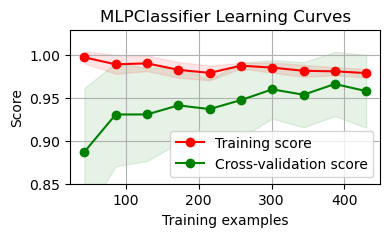

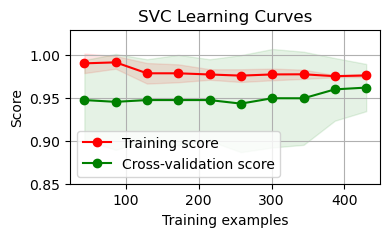

In [20]:
%%time

# Code shamelessly copied from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

# assign directory
directory = './Models/breast_cancer'
 
# iterate over files in that directory
tuned_models = Path(directory).glob('hypertuned_*')

for tuned_model in tuned_models:

    tuned_model = joblib.load(tuned_model)
    if isinstance(tuned_model, DecisionTreeClassifier):
        label = "DecisionTreeClassifier"
    elif isinstance(tuned_model, AdaBoostClassifier):
        label = "AdaBoostClassifier"
    elif isinstance(tuned_model, KNeighborsClassifier):
        label = "KNeighborsClassifier"
    elif isinstance(tuned_model, SVC):
        label = "SVC"
    else:
        label = "MLPClassifier"
#         continue
    
    
    train_sizes, train_scores, test_scores, fit_times, score_times  = learning_curve(tuned_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, return_times=True, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))

    # Plot learning curve
    ax.grid()
    ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.set_title(f"{label} Learning Curves")
    ax.set_ylim(0.85, 1.03)

In [ ]:
%%time
# Create a graph of combined fit times
# Code shamelessly copied from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
 
# assign directory
directory = './Models/'
 
# iterate over files in that directory
tuned_models = Path(directory).glob('hypertuned_*')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(23, 5))

for tuned_model in tuned_models:

    tuned_model = joblib.load(tuned_model)

    if isinstance(tuned_model, DecisionTreeClassifier):
        label = "DecisionTreeClassifier"
        color = "orange"
    elif isinstance(tuned_model, AdaBoostClassifier):
        label = "AdaBoostClassifier"
        color = "tab:blue"
    elif isinstance(tuned_model, KNeighborsClassifier):
        label = "KNeighborsClassifier"
        color = "green"
    elif isinstance(tuned_model, SVC):
        label = "SVC"
        color = "red"
    else:
        label = "MLPClassifier"
        color = "tab:purple"
        continue
    
    train_sizes, train_scores, test_scores, fit_times, score_times  = learning_curve(tuned_model, X, y, train_sizes=np.linspace(0.1, 1.0, 11), cv=5, return_times=True, shuffle=True)
    fit_times, score_times = fit_times*1000, score_times*1000
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)
    
    if isinstance(tuned_model, KNeighborsClassifier):
        score_times_mean[0] = np.min(score_times[0])

    # Plot n_samples vs fit_times
    ax[0].grid()
    ax[0].plot(train_sizes, fit_times_mean, "o-", color=color, label=label)
    ax[0].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
        color=color
    )
    
    # Plot n_samples vs fit_times
    ax[1].grid()
    ax[1].plot(train_sizes, score_times_mean, "o-", color=color, label=label)
#     ax[1].fill_between(
#         train_sizes,
#         score_times_mean - score_times_std,
#         score_times_mean + score_times_std,
#         alpha=0.1,
#     )
    
ax[0].set_xlabel("Training examples", fontsize=18)
ax[0].set_ylabel("Training fit_times (ms)", fontsize=18)
ax[0].set_title("Scalability of the model - Training", fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize=15)
ax[0].grid()

ax[1].set_xlabel("Training examples", fontsize=18)
ax[1].set_ylabel("Predict Times (ms)", fontsize=18)
ax[1].set_title("Scalability of the model - Predicting", fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].legend(fontsize=15)
ax[1].grid()

# Scratch Work

In [ ]:
# #Visualizing KNN Decision Boundary

# from matplotlib.colors import ListedColormap
# from sklearn.inspection import DecisionBoundaryDisplay

# n_neighbors = 9

# X = df[config.features].iloc[:, [0]+[-1]]

# # Create color maps
# cmap_light = ListedColormap(["orange", "cyan"])
# cmap_bold = ["darkorange", "c"]

# for weights in ["uniform", "distance"]:
#     # we create an instance of Neighbours Classifier and fit the data.
#     clf = KNeighborsClassifier(n_neighbors, weights=weights)
#     clf.fit(X, y)

#     _, ax = plt.subplots()
#     DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X,
#         cmap=cmap_light,
#         ax=ax,
#         response_method="predict",
#         plot_method="pcolormesh",
#         xlabel=X.columns[0],
#         ylabel=X.columns[1],
#         shading="auto",
#     )

#     # Plot also the training points
#     sns.scatterplot(
#         x=X.iloc[:, 0],
#         y=X.iloc[:, 1],
#         hue=y,
#         palette=cmap_bold,
#         alpha=1.0,
#         edgecolor="black",
#     )
#     plt.title(
#         "KNN Classifier (k = %i, weights = '%s')" % (n_neighbors, weights)
#     )

# plt.show()

In [ ]:
# from sklearn import svm
# from sklearn.inspection import DecisionBoundaryDisplay

# X = df[config.features].iloc[:, [0]+[-1]]

# # we create an instance of SVM and fit out data. We do not scale our
# # data since we want to plot the support vectors
# C = 1.0  # SVM regularization parameter
# models = (
#     svm.SVC(kernel="linear", C=C),
#     svm.LinearSVC(C=C, max_iter=10000),
#     svm.SVC(kernel="rbf", gamma=0.7, C=C),
#     svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
# )
# models = (clf.fit(X, y) for clf in models)

# # title for the plots
# titles = (
#     "SVC with linear kernel",
#     "LinearSVC (linear kernel)",
#     "SVC with RBF kernel",
#     "SVC with polynomial (degree 3) kernel",
# )

# # Set-up 2x2 grid for plotting.
# fig, sub = plt.subplots(2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

# X0, X1 = X.iloc[:, 0], X.iloc[:, 1]

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X,
#         response_method="predict",
#         cmap=plt.cm.coolwarm,
#         alpha=0.8,
#         ax=ax,
#         xlabel=X.columns[0],
#         ylabel=X.columns[1],
#     )
#     ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)

# plt.show()